Design a two-layer MLP to create a decision boundary as belows.

Note that the pentagon decision boundary goes through 5 points (0.2, 0.7), (0.3, 0.2), (0.5, 1.0), (0.7, 0.2), and (0.8, 0.7).

Data items inside and on the edges of the pentagon are considered class 1. Otherwise, they are considered class 0.

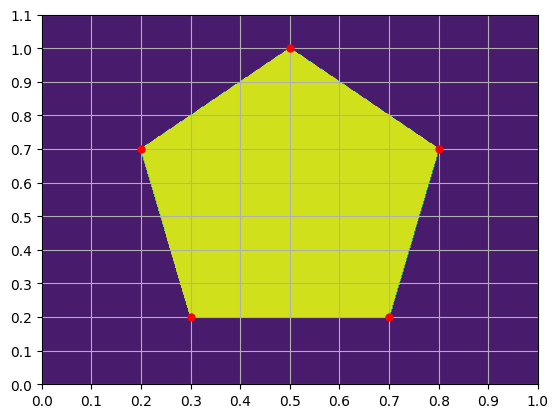

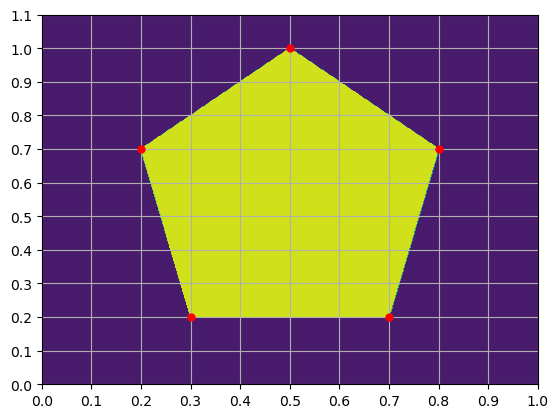

In [3]:
# THAM KHẢO
# Show that 2 layer MLP (with manually chosen weights) can solve the XOR problem
# Based on
# https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb


import numpy as np
import matplotlib.pyplot as plt

def activation(z):
    return np.double(z >= 0)

def mlp(x1, x2):
    # Enter your code here
    # Coefficients for the lines based on the points provided
    # Line from (0.2, 0.7) to (0.5, 1.0)
    A1, B1, C1 = (1.0 - 0.7), -(0.5 - 0.2), (0.5*0.7 - 1.0*0.2)
    # Line from (0.5, 1.0) to (0.8, 0.7)
    A2, B2, C2 = (0.7 - 1.0), -(0.8 - 0.5), (0.8*1.0 - 0.7*0.5)
    # Line from (0.8, 0.7) to (0.7, 0.2)
    A3, B3, C3 = (0.2 - 0.7), -(0.7 - 0.8), (0.7*0.7 - 0.2*0.8)
    # Line from (0.7, 0.2) to (0.3, 0.2)
    A4, B4, C4 = (0.2 - 0.2), -(0.3 - 0.7), (0.3*0.2 - 0.2*0.7)
    # Line from (0.3, 0.2) to (0.2, 0.7)
    A5, B5, C5 = (0.7 - 0.2), -(0.2 - 0.3), (0.2*0.2 - 0.7*0.3)

    # First layer (hidden layer with 5 neurons)
    z1 = activation(A1*x1 + B1*x2 + C1)
    z2 = activation(A2*x1 + B2*x2 + C2)
    z3 = activation(A3*x1 + B3*x2 + C3)
    z4 = activation(A4*x1 + B4*x2 + C4)
    z5 = activation(A5*x1 + B5*x2 + C5)
    
    # Combine the outputs from the first layer
    # Assuming a point is inside the pentagon if it's on the "positive" side of all 5 lines
    combined = z1 + z2 + z3 + z4 + z5
    
    # Second layer (output layer with 1 neuron)
    # A point is considered inside the pentagon if it activates all 5 neurons in the first layer
    output = activation(combined - 5)
    
    return output
    ######################

x1s = np.linspace(0.0, 1.0, 500)
x2s = np.linspace(0.0, 1.1, 500)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp(x1, x2)

# Plot the decision boundary
plt.figure()
plt.contourf(x1, x2, z1)
plt.plot([0.2, 0.3, 0.5, 0.7, 0.8], [0.7, 0.2, 1.0, 0.2, 0.7], "ro", markersize=5)

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.2, step=0.1))
plt.grid(True)
plt.show()

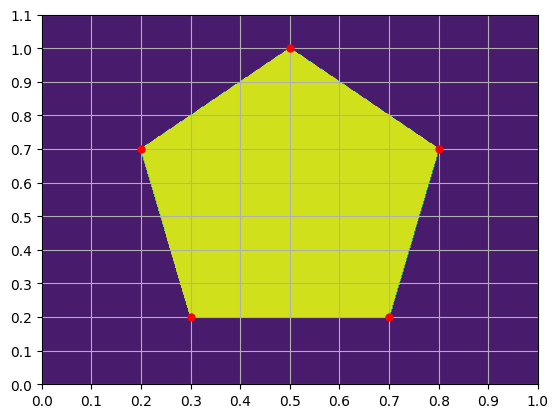